In [1]:
import numpy as np
from matplotlib import pyplot as plt
from orbits import Orbit
from extras.enmax import find_en_max
from extras.functions import en_search, plot_modes
from extras.sep import find_slr

In [2]:
# set params
aa = 0.998
slr = 7
ecc = 0.99
x = 1

In [3]:
# mode params
ell = 2
em = 2
kay = 0

In [4]:
slr = find_slr(aa, ecc)
slr_eps = 1.01 * slr
print(slr)

2.1827809662219595


In [5]:
orbit = Orbit(aa, slr_eps, ecc, x)

In [6]:
en_predicted = find_en_max(aa, slr_eps, ecc, x, em)

In [7]:
en_min = en_predicted - 10
en_max = en_predicted + 10
results = en_search(orbit, ell, em, en_min, en_max)

[2, 2, 1076766, 8.88977590035293e-11]
[2, 2, 1076767, 8.88983941856093e-11]
[2, 2, 1076768, 8.889902900323899e-11]
[2, 2, 1076769, 8.889966345634686e-11]
[2, 2, 1076770, 8.890029754485427e-11]
[2, 2, 1076771, 8.890093126875088e-11]
[2, 2, 1076772, 8.890156462793948e-11]
[2, 2, 1076773, 8.890219762237659e-11]
[2, 2, 1076774, 8.890283025201708e-11]
[2, 2, 1076775, 8.890346251675129e-11]
[2, 2, 1076776, 8.890409441656457e-11]
[2, 2, 1076777, 8.89047259514074e-11]
[2, 2, 1076778, 8.890535712118133e-11]
[2, 2, 1076779, 8.89059879258749e-11]
[2, 2, 1076780, 8.890661836538086e-11]
[2, 2, 1076781, 8.890724843966787e-11]
[2, 2, 1076782, 8.890787814867957e-11]
[2, 2, 1076783, 8.890850749235406e-11]
[2, 2, 1076784, 8.890913647062178e-11]
[2, 2, 1076785, 8.890976508346086e-11]
[2, 2, 1076786, 8.891039333076464e-11]


No handles with labels found to put in legend.


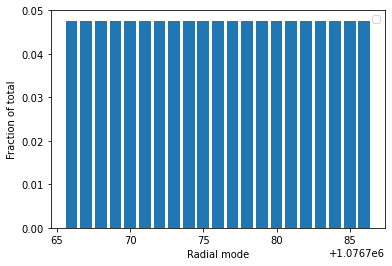

In [9]:
normed=True
if normed:
    plt.bar(results[:, 2], results[:, 3]/ np.sum(results[:, 3]))
else:
    plt.bar(results[:, 2], results[:, 3])


# plt.axvline(x=2, color='C3', label='Predicted radial max')
plt.legend()
plt.xlabel('Radial mode')
plt.ylabel('Fraction of total')
plt.show()